# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from pprint import pprint
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = "INSERT_APY_KEY_HERE"
target_url = f"{base_url}appid={api_key}&units={units}&q="

In [7]:
print(requests.get(target_url+city))


<Response [200]>


In [8]:
response = requests.get(target_url + city).json()
print(json.dumps(response, indent = 4, sort_keys = True))

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 12.63,
        "lon": 80.17
    },
    "dt": 1559432279,
    "id": 1263997,
    "main": {
        "humidity": 74,
        "pressure": 1004,
        "temp": 86.81,
        "temp_max": 87.8,
        "temp_min": 86
    },
    "name": "Mamallapuram",
    "sys": {
        "country": "IN",
        "id": 9218,
        "message": 0.0047,
        "sunrise": 1559434367,
        "sunset": 1559480519,
        "type": 1
    },
    "timezone": 19800,
    "visibility": 6000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 6.93
    }
}


In [9]:
city_name = []
country = []
latitude = []
longtitude = []
date = []
cloudiness = []
max_temperature = []
humidity = []
wind_speed = []


city_counter = 1


print("Beginning Data Retrieval")
print("-----------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each

for city in cities:
    
    try:
        
        city_response = requests.get(target_url + city).json()
        city_name.append(city_response["name"])
        country.append(city_response["sys"]["country"])
        latitude.append(city_response["coord"]["lat"])
        longtitude.append(city_response["coord"]["lon"])
        date.append(city_response["dt"])
        cloudiness.append(city_response["clouds"]["all"])
        max_temperature.append(city_response["main"]["temp_max"])
        humidity.append(city_response["main"]["humidity"])
        wind_speed.append(city_response["wind"]["speed"])
        city_records = city_response["name"]
        
        print(f"Processing Record {city_counter} | {city_records}")
        print(f"{target_url}{city}")
              
        city_counter = city_counter + 1
              
        time.sleep(1)

    except:
      
        print("City not found. Skipping...")
        
    continue

print("-----------------------------")
print(f"Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Hede
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=hede
Processing Record 2 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=busselton
Processing Record 3 | Havelock
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=havelock
Processing Record 4 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=mount gambier
Processing Record 5 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=rikitea
Processing Record 6 | Avarua
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=avarua
Processing Record 7 | Lagoa
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8

City not found. Skipping...
Processing Record 57 | Cheyenne
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=cheyenne
Processing Record 58 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=bathsheba
Processing Record 59 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=vila franca do campo
Processing Record 60 | Bethel
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=bethel
Processing Record 61 | Victoria
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=victoria
Processing Record 62 | Paciran
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=paciran
Processing Record 63 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?ap

Processing Record 112 | Alofi
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=alofi
City not found. Skipping...
Processing Record 113 | Rundu
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=rundu
Processing Record 114 | Mahon
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=mahon
Processing Record 115 | Karratha
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=karratha
Processing Record 116 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=kaitangata
Processing Record 117 | Isangel
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=isangel
Processing Record 118 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f283

Processing Record 167 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=norman wells
City not found. Skipping...
Processing Record 168 | Dingtao
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=dingtao
Processing Record 169 | Provo
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=provo
Processing Record 170 | Pitimbu
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=pitimbu
Processing Record 171 | Barghat
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=barghat
Processing Record 172 | Dalnegorsk
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=dalnegorsk
Processing Record 173 | Mattru
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748

Processing Record 222 | Fort Saint James
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=fort saint james
Processing Record 223 | Iquique
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=iquique
Processing Record 224 | Saint-Gabriel
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=saint-gabriel
Processing Record 225 | Raudeberg
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=raudeberg
Processing Record 226 | Oranjestad
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=oranjestad
Processing Record 227 | Kaarina
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=kaarina
Processing Record 228 | Thompson
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d727

Processing Record 278 | Ulladulla
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=ulladulla
Processing Record 279 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=tuktoyaktuk
Processing Record 280 | Oparino
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=oparino
Processing Record 281 | Thinadhoo
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=thinadhoo
City not found. Skipping...
Processing Record 282 | Knysna
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=knysna
Processing Record 283 | Georgetown
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=georgetown
Processing Record 284 | Chumphon
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8

Processing Record 333 | Senno
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=senno
Processing Record 334 | Saint-Joseph
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=saint-joseph
Processing Record 335 | Strezhevoy
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=strezhevoy
Processing Record 336 | Nioro
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=nioro
Processing Record 337 | Kyabe
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=kyabe
Processing Record 338 | Lovozero
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=lovozero
Processing Record 339 | Camalu
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=ca

Processing Record 389 | Rosarito
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=rosarito
Processing Record 390 | Diu
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=diu
City not found. Skipping...
Processing Record 391 | Esperance
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=esperance
Processing Record 392 | Jardim
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=jardim
City not found. Skipping...
City not found. Skipping...
Processing Record 393 | Biak
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=biak
Processing Record 394 | Puerto Escondido
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=puerto escondido
Processing Record 395 | Nishihara
http://api.openw

City not found. Skipping...
Processing Record 444 | Balkhash
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=balkhash
Processing Record 445 | Mayo
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=mayo
Processing Record 446 | Carballo
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=carballo
Processing Record 447 | Ubatuba
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=ubatuba
Processing Record 448 | Aden
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=aden
Processing Record 449 | Maltahohe
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=maltahohe
City not found. Skipping...
Processing Record 450 | Gorodishche
http://api.openweathermap.org/data/2.5/weather?appid=2

Processing Record 501 | Ballina
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=ballina
Processing Record 502 | Claresholm
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=claresholm
Processing Record 503 | Lata
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=lata
Processing Record 504 | Novikovo
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=novikovo
Processing Record 505 | Ouesso
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=ouesso
Processing Record 506 | Puerto Baquerizo Moreno
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=puerto baquerizo moreno
Processing Record 507 | Yingcheng
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973

Processing Record 556 | Maceio
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=maceio
Processing Record 557 | Henties Bay
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=henties bay
Processing Record 558 | Kungurtug
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=kungurtug
Processing Record 559 | El Alto
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=el alto
Processing Record 560 | Pandan
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=pandan
Processing Record 561 | Iracoubo
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&q=iracoubo
Processing Record 562 | Jerome
http://api.openweathermap.org/data/2.5/weather?appid=2522d0d8a483d72748bf973f28364549&units=imperial&

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_data = {
            "City": city_name,
            "Cloudiness": cloudiness,
            "Country": country,
            "Date": date,
            "Humidity": humidity,
            "Lat": latitude,
            "Lng": longtitude,
            "Max Temp": max_temperature,
            "Wind Speed": wind_speed
}

weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [11]:
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hede,20,SE,1559432355,100,60.45,15.49,48.20,5.82
1,Busselton,0,AU,1559432357,69,-33.64,115.35,55.99,3.00
2,Havelock,90,US,1559432114,94,34.88,-76.90,75.99,4.70
3,Mount Gambier,90,AU,1559432275,100,-37.83,140.78,50.00,11.41
4,Rikitea,100,PF,1559432318,79,-23.12,-134.97,73.83,23.40


In [13]:
weather_df.to_csv("../Resources/Weather_data.csv")


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

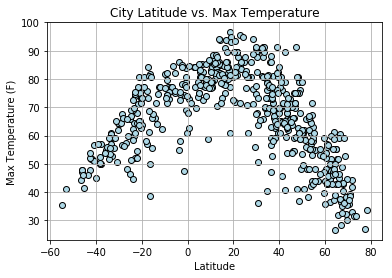

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolors = "lightblue", edgecolors = "black")
plt.grid()

# Create Title and Labels

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save figure in PNG file

plt.savefig("../Images/City_Latitude_vs._Max_Temperature.png")

#### Latitude vs. Temperature Plot

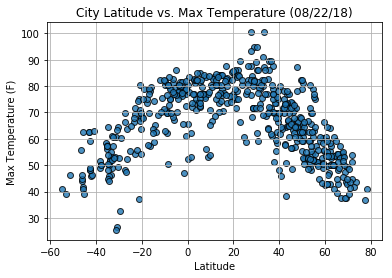

#### Latitude vs. Humidity Plot

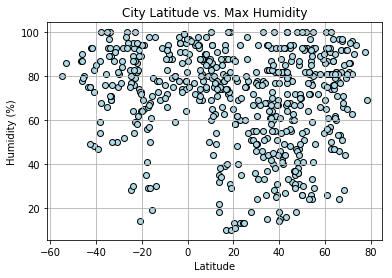

In [15]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors = "lightblue", edgecolors = "black")
plt.grid()

plt.title("City Latitude vs. Max Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../Images/City_Latitude_vs._Humidity.png")

#### Latitude vs. Cloudiness Plot

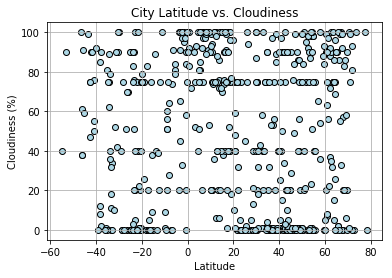

In [16]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors = "lightblue", edgecolors = "black")
plt.grid()

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("../Images/City_Latitude_vs._Cloudiness.png")

#### Latitude vs. Wind Speed Plot

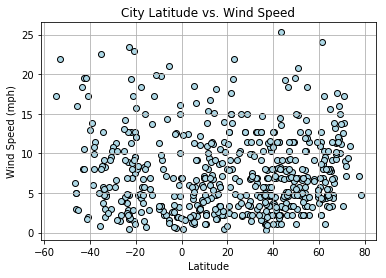

In [17]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolors = "lightblue", edgecolors = "black")
plt.grid()

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.savefig("../Images/City_Latitude_vs._Wind_Speed.png")